<a href="https://colab.research.google.com/github/LuisAntonioDoHer/Movies_data_analysis/blob/main/Movies_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Import libraries






In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

## Create Dataframe

In [69]:
df = pd.read_csv('/content/movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##Cleaning data

In [70]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [71]:
df.drop(columns = ['imdb_id','cast','homepage','cast', 'tagline', 'overview', 'budget_adj'], inplace = True )

In [72]:
df.head(5)

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09


In [73]:
df.dropna(how = 'any', subset= ['director', 'genres'], inplace = True )

In [74]:
df['production_companies'] = df['production_companies'].fillna(0)
df['keywords'] = df['keywords'].fillna(0)

In [75]:
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
revenue_adj             0
dtype: int64

In [76]:
df['popularity'] = df['popularity'].round(2)
df.head(5)

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,135397,32.99,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,76341,28.42,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,262500,13.11,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,140607,11.17,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,168259,9.34,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09


In [77]:
df.insert(3,'profit', df.revenue - df.budget)
df.head(10)

,id,popularity,budget,profit,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,135397,32.99,150000000,1363528810,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,76341,28.42,150000000,228436354,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,262500,13.11,110000000,185238201,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,140607,11.17,200000000,1868178225,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,168259,9.34,190000000,1316249360,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09
5,281957,9.11,135000000,397950503,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,4.903142e+08
6,87101,8.65,155000000,285603537,440603537,Terminator Genisys,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,4.053551e+08
7,286217,7.67,108000000,487380321,595380321,The Martian,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,5.477497e+08
8,211672,7.40,74000000,1082730962,1156730962,Minions,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,1.064192e+09
9,150540,6.33,175000000,678708609,853708609,Inside Out,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,7.854116e+08


In [78]:
df.insert(4,'roi', df.profit / df.budget)
df['roi'] = df['roi'].round(2)
df.head(10)

,id,popularity,budget,profit,roi,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,76341,28.42,150000000,228436354,1.52,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,262500,13.11,110000000,185238201,1.68,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,140607,11.17,200000000,1868178225,9.34,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,168259,9.34,190000000,1316249360,6.93,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09
5,281957,9.11,135000000,397950503,2.95,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,4.903142e+08
6,87101,8.65,155000000,285603537,1.84,440603537,Terminator Genisys,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,4.053551e+08
7,286217,7.67,108000000,487380321,4.51,595380321,The Martian,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,5.477497e+08
8,211672,7.40,74000000,1082730962,14.63,1156730962,Minions,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,1.064192e+09
9,150540,6.33,175000000,678708609,3.88,853708609,Inside Out,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,7.854116e+08


In [85]:
df1 = df[['popularity', 'budget', 'revenue', 'profit', 'roi','vote_count', 'vote_average', 'release_year' ]]
df.isnull().sum()

id                         0
popularity                 0
budget                     0
profit                     0
roi                     5636
revenue                    0
original_title             0
director                   0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
revenue_adj                0
dtype: int64

In [80]:
df.roi.value_counts()

roi
-1.00     1350
 inf       995
-0.99       29
-0.98       27
-0.38       21
          ... 
 4.15        1
 24.90       1
 2.32        1
 6.24        1
 6.62        1
Name: count, Length: 1075, dtype: int64

In [81]:
non_finite_values = ~np.isfinite(df['roi'])

In [82]:
non_finite_values.sum()

5636

In [83]:
df['roi'] = df['roi'].replace([np.inf, - np.inf], np.nan)

## Data Visualization

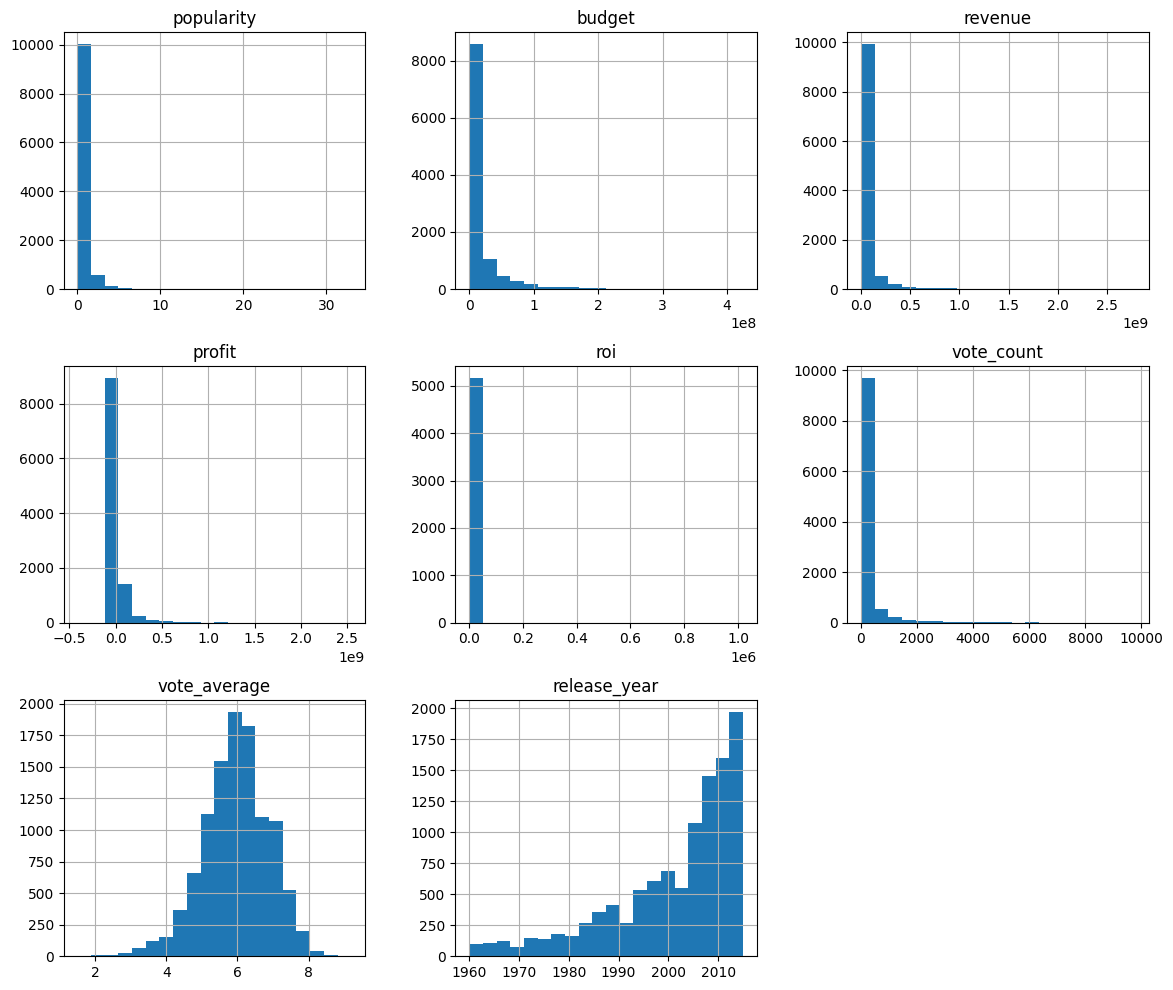

In [86]:
df1.hist(bins = 20, figsize=(14,12))
plt.show()

In [87]:
df.popularity.value_counts()

popularity
0.14    193
0.28    190
0.21    186
0.25    182
0.20    179
       ... 
5.81      1
5.08      1
3.83      1
3.74      1
2.68      1
Name: count, Length: 483, dtype: int64

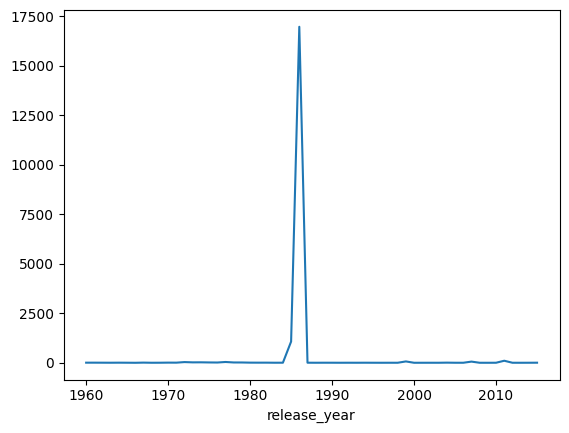

In [88]:
df2 =  df.groupby('release_year')['roi'].mean()
df2.plot(kind = 'line', legend = False)
plt.show()


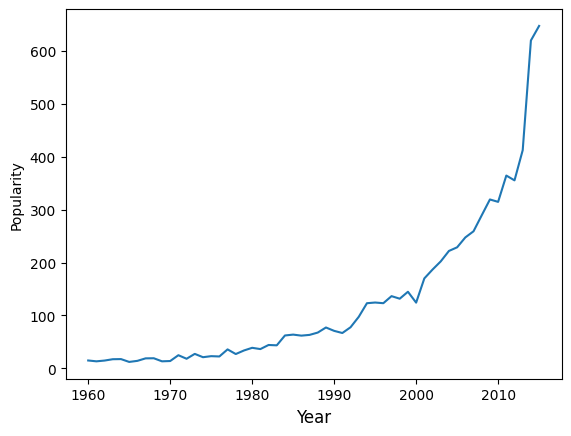

In [89]:
df3 = df.groupby('release_year')['popularity'].sum()
df3.plot(kind = 'line')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Popularity')
plt.show()

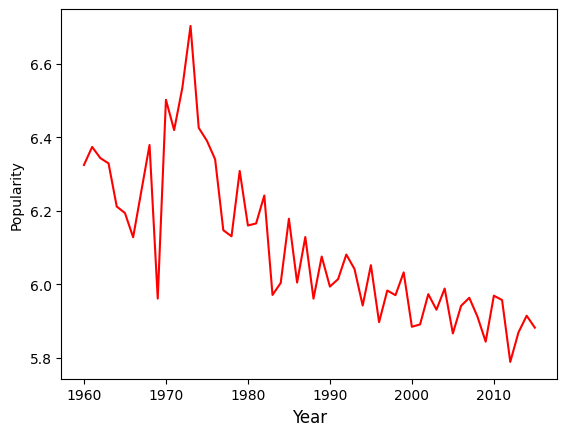

In [90]:
df4 = df.groupby('release_year')['vote_average'].mean()
df4.plot(kind = 'line', color = 'red')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Popularity')
plt.show()

Text(0.5, 1.0, 'Popularity vs Vote Average')

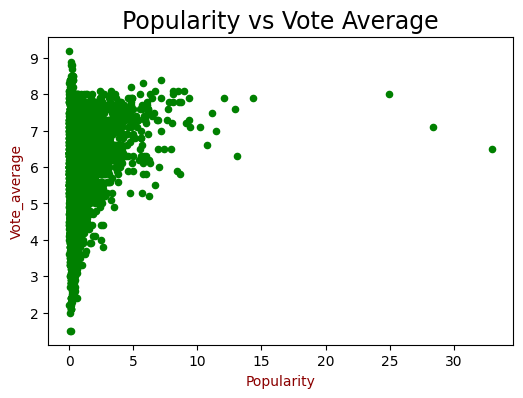

In [91]:
df5 = df.plot.scatter(x='popularity', y='vote_average', c='green', figsize=(6,4))
df5.set_xlabel('Popularity', color = 'DarkRed')
df5.set_ylabel('Vote_average', color = 'DarkRed')
df5.set_title('Popularity vs Vote Average', fontsize = 17)



##Genres Popularity

In [99]:
df.genres.value_counts()

genres
Drama              4755
Comedy             3782
Thriller           2905
Action             2379
Romance            1708
Horror             1636
Adventure          1466
Crime              1354
Science Fiction    1224
Family             1223
Fantasy             912
Mystery             809
Animation           692
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
Name: count, dtype: int64

In [92]:
split = ['genres']
for i in split:
  df[i] = df[i].apply(lambda x: x.split("|"))

In [93]:
df.head()

,id,popularity,budget,profit,roi,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,76341,28.42,150000000,228436354,1.52,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,262500,13.11,110000000,185238201,1.68,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,140607,11.17,200000000,1868178225,9.34,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,168259,9.34,190000000,1316249360,6.93,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09


In [94]:
df = df.explode('genres')
df

,id,popularity,budget,profit,roi,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,76341,28.42,150000000,228436354,1.52,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,0.07,0,0,NaN,0,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10863,39768,0.07,0,0,NaN,0,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10864,21449,0.06,0,0,NaN,0,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00
10864,21449,0.06,0,0,NaN,0,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00


In [96]:
df7 = df.groupby('genres')['popularity'].sum().sort_values(ascending = True)
df7

genres
Foreign              35.24
TV Movie             44.03
Documentary          93.13
Western              97.42
History             192.35
War                 196.48
Music               198.15
Mystery             558.55
Animation           594.46
Horror              761.39
Fantasy             908.87
Family              967.06
Crime              1009.07
Romance            1013.21
Science Fiction    1230.41
Adventure          1697.11
Thriller           2155.90
Action             2208.08
Comedy             2246.25
Drama              2815.43
Name: popularity, dtype: float64

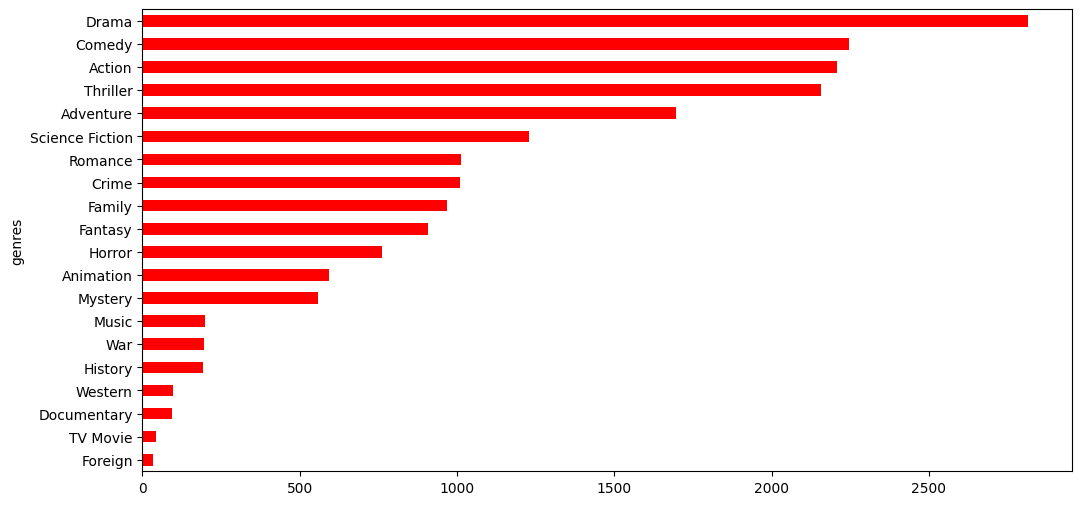

In [100]:
df7.plot.barh(x = 'genres', y = 'popilarity', color = 'red', figsize = (12,6))
plt.show()

##Change release date to datetime

In [103]:
df.dtypes

id                        int64
popularity              float64
budget                    int64
profit                    int64
roi                     float64
revenue                   int64
original_title           object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
revenue_adj             float64
dtype: object

In [104]:
df['release_date'] = pd.to_datetime(df['release_date'])

<ipython-input-104-bd17abdb2e31>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [105]:
df.dtypes

id                               int64
popularity                     float64
budget                           int64
profit                           int64
roi                            float64
revenue                          int64
original_title                  object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
revenue_adj                    float64
dtype: object

In [106]:
df.head(5)

,id,popularity,budget,profit,roi,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09
1,76341,28.42,150000000,228436354,1.52,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,3.481613e+08


In [107]:
df['extracted_month'] = df['release_date'].dt.month

In [108]:
df.head()

,id,popularity,budget,profit,roi,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj,extracted_month
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,135397,32.99,150000000,1363528810,9.09,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
1,76341,28.42,150000000,228436354,1.52,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,3.481613e+08,5


In [110]:
df8 = df.groupby('extracted_month')['popularity'].sum()


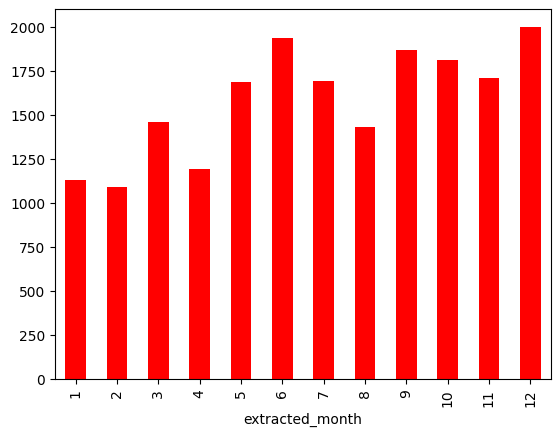

In [112]:
df8.plot(kind = 'bar', color = 'red')
plt.show()